# Assignment 1 :

## **MIT License**
Copyright (c) 2023 Aditya Pravin Pande

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

Abstract:

---
This abstract presents a data model for detecting the prices of laptops. The model utilizes machine learning algorithms to analyze a large dataset of laptop specifications and prices. The objective is to build a model that can accurately predict the prices of laptops based on their specifications, such as processor type, graphics card, RAM, and storage capacity. The model consists of a diverse set of laptops and the results are expected  to showe a high accuracy in price prediction. This model can be useful for both consumers and businesses in the laptop industry, as it provides a fast and efficient way to determine the expected price of a laptop based on its specifications.

In this assignment we will be answering the following questions:

What are the data types? (Only numeric and categorical)

Are there missing values?

What are the likely distributions of the numeric variables?

Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

Which independent variables have missing data? How much?

Do the training and test sets have the same data?

In the predictor variables independent of all the other predictor variables?

Which predictor variables are the most important?

Do the ranges of the predictor variables make sense?

What are the distributions of the predictor variables?

Remove outliers and keep outliers (does if have an effect of the final predictive model)?

Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values? That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.



# Importing the basic libraries required

In [129]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [130]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot


# Reading the Dataset

In [131]:
data = pd.read_csv("https://raw.githubusercontent.com/Aditya260698/Data-Science-Engineering-Methods-and-Tools/main/laptopsds.csv", encoding="Latin")
#data.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [132]:
data.to_csv("/content/laptopsds.csv", encoding="utf-8")

In [133]:
data


,Manufacturer,Model Name,Category,Screen Size,Screen,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price (Euros)
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,898.94
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,"14.0""",IPS Panel Full HD / Touchscreen 1920x1080,4GB,128GB SSD,Intel HD Graphics 520,Windows,10,1.8kg,638.00
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,"13.3""",IPS Panel Quad HD+ / Touchscreen 3200x1800,16GB,512GB SSD,Intel HD Graphics 520,Windows,10,1.3kg,1499.00
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,"14.0""",1366x768,2GB,64GB Flash Storage,Intel HD Graphics,Windows,10,1.5kg,229.00
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,"15.6""",1366x768,6GB,1TB HDD,AMD Radeon R5 M330,Windows,10,2.19kg,764.00


11 physical characteristics of Laptop dataset i.e. Manufacturer, Model Name, Category, Screen Size, Screen, RAM, Storage, GPU, Operating System, Weight - The Independent variables and
Price (Euros) - The dependent variable

There are a total of 1303 observations.

# What are the data types? (Only numeric and categorical)
A: The data types are mostly numeric data except for Manufacturer, Model Name, Category, Screen, GPU

#Which independent variables have missing data? How much?

In [134]:
data.isnull().sum()

Manufacturer                  0
Model Name                    0
Category                      0
Screen Size                   0
Screen                        0
RAM                           0
 Storage                      0
GPU                           0
Operating System              0
Operating System Version    170
Weight                        0
Price (Euros)                 0
dtype: int64

A: Above we can see that Operating System Version has missing values but for predicting the Price of the laptop it is not necessary thus we can ignore the column. 

# Data cleaning
The dataset contains various columns like Manufacturer ,Model Name, Category, GPU, Operating System Version do not directly corelate with the price of the laptop so we can drop those columns. On the other hand the data contains valuse which are important to perdict the price of the laptop but are present in String datatype so we are converting those values in Float or Int for calculating the results and work on the data.

In [135]:
data = data.dropna()

In [136]:
data['Screen Size'] = data['Screen Size'].str.replace(r'\D', '').astype(float)
data['RAM'] = data['RAM'].str.replace(r'\D', '').astype(int)
data[' Storage'] = data[' Storage'].str.replace(r'\D', '').astype(int)
data['Weight'] = data['Weight'].str.replace(r'\D', '').astype(float)

<ipython-input-136-f7dccffda44a>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Screen Size'] = data['Screen Size'].str.replace(r'\D', '').astype(float)
<ipython-input-136-f7dccffda44a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Screen Size'] = data['Screen Size'].str.replace(r'\D', '').astype(float)
<ipython-input-136-f7dccffda44a>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['RAM'] = data['RAM'].str.replace(r'\D', '').astype(int)
<ipython-input-136-f7dccffda44a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [137]:
one_hot = {'Windows':1, 'No OS':0, 'Linux':2, 'Chrome OS':3, 'macOS':4, 'Mac OS':4, 'Android':5}

data['Operating System'] = [one_hot[item] for item in data['Operating System']]
print(data.head())

   Manufacturer       Model Name   Category  Screen Size  \
5          Acer         Aspire 3   Notebook        156.0   
6         Apple      MacBook Pro  Ultrabook        154.0   
8          Asus  ZenBook UX430UN  Ultrabook        140.0   
9          Acer          Swift 3  Ultrabook        140.0   
13         Dell    Inspiron 3567   Notebook        156.0   

                                Screen  RAM   Storage  \
5                             1366x768    4       500   
6   IPS Panel Retina Display 2880x1800   16       256   
8                    Full HD 1920x1080   16       512   
9          IPS Panel Full HD 1920x1080    8       256   
13                   Full HD 1920x1080    4       256   

                        GPU  Operating System Operating System Version  \
5             AMD Radeon R5                 1                       10   
6   Intel Iris Pro Graphics                 4                        X   
8      Nvidia GeForce MX150                 1                       10   


<ipython-input-137-4fe49e47678e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Operating System'] = [one_hot[item] for item in data['Operating System']]


#How are the values distributed?
For this we can use the .describe() method.

In [138]:
data_norm.describe()

,Screen Size,RAM,Storage,Operating System,Weight,Price (Euros)
count,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000
mean,150.249779,8.688438,2375.533098,1.021183,122.744925,1190.237988
std,14.128396,5.254564,26297.473767,0.251307,162.198961,705.021847
min,101.000000,2.000000,1.000000,1.000000,2.000000,191.900000
25%,140.000000,4.000000,128.000000,1.000000,22.000000,669.000000
50%,156.000000,8.000000,256.000000,1.000000,116.000000,1049.260000
75%,156.000000,8.000000,512.000000,1.000000,191.000000,1545.640000
max,184.000000,64.000000,512512.000000,4.000000,2591.000000,6099.000000


Above we get a general description of numeric data which mentions the mean, standard deviation, min value, max value etc.

# What are the distributions of the predictor variables?

<Figure size 576x360 with 0 Axes>

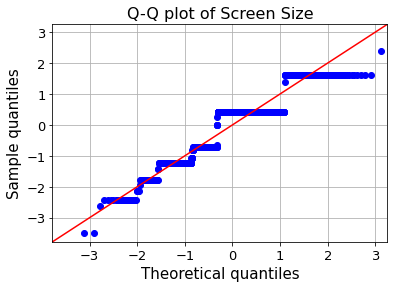

<Figure size 576x360 with 0 Axes>

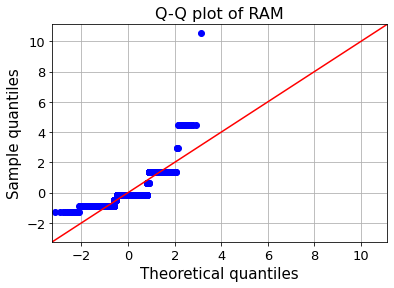

<Figure size 576x360 with 0 Axes>

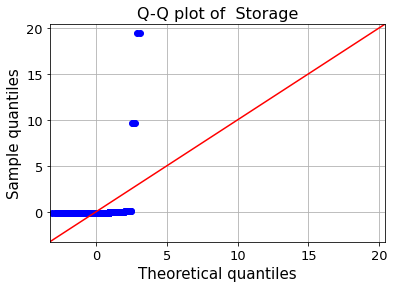

<Figure size 576x360 with 0 Axes>

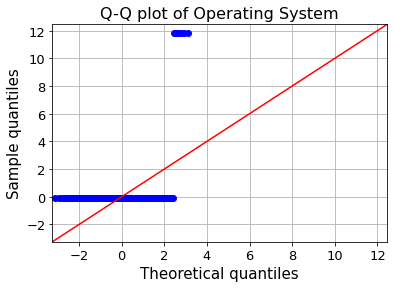

<Figure size 576x360 with 0 Axes>

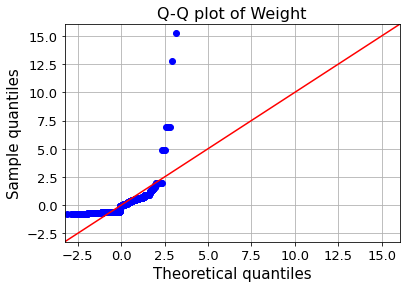

<Figure size 576x360 with 0 Axes>

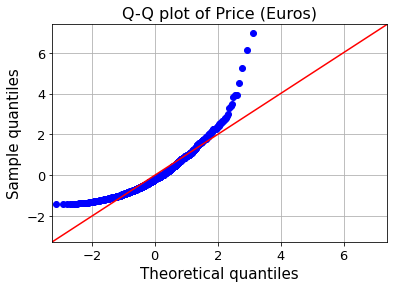

In [139]:
from statsmodels.graphics.gofplots import qqplot
data_norm=data[['Screen Size', 'RAM', ' Storage','Operating System', 'Weight', 'Price (Euros)']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

|Column name | Distributions|
|------------|:-------------|
| Screen Size    | Step distribution|
|RAM | Step distribution|
|Storage| Step distribution |
|Operating System| Step distribution|
|Weight| Exponential distribution|
|Price (Euros)| Exponential distribution|



# Data Normalization
We have data and the respective features selected. We want to predict for price of the laptop based on the features we have selected.

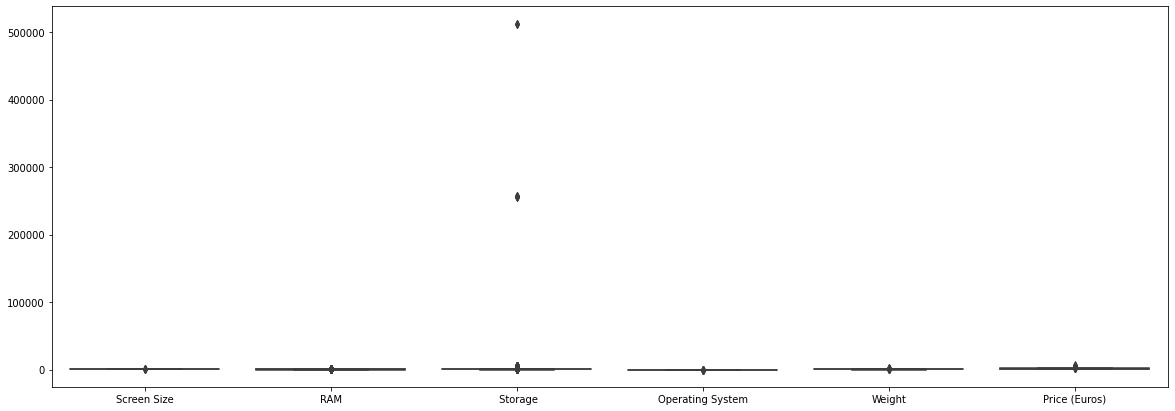

In [140]:
plt.figure(figsize=(20,7))
#data = data[['Screen Size', 'RAM', ' Storage', 'Operating System', 'Weight', 'Price (Euros)']]
sns.boxplot(data=data_norm)

We need to normalize the data for Storage, Screen Size, Operating System, RAM, Weight, Price (Euros).

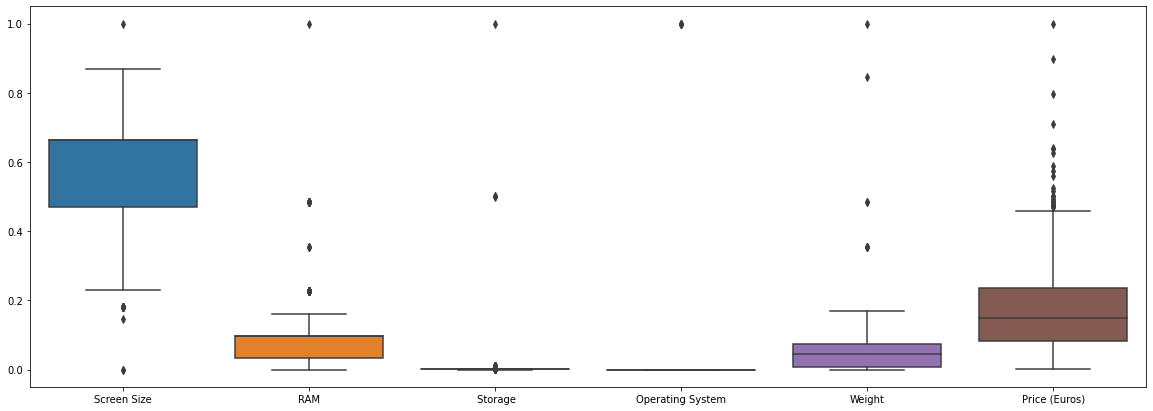

In [141]:
data = pd.get_dummies(data_norm)
from sklearn import preprocessing

xJS = data[[' Storage']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
xS = min_max_scaler.fit_transform(xJS)
data[[' Storage']] = pd.DataFrame(xS)

xJSS = data[['Screen Size']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
xSS = min_max_scaler.fit_transform(xJSS)
data[['Screen Size']] = pd.DataFrame(xSS)

xJOS = data[['Operating System']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
xOS = min_max_scaler.fit_transform(xJOS)
data[['Operating System']] = pd.DataFrame(xOS)

xJR = data[['RAM']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
xR = min_max_scaler.fit_transform(xJR)
data[['RAM']] = pd.DataFrame(xR)

xJW = data[['Weight']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
xW = min_max_scaler.fit_transform(xJW)
data[['Weight']] = pd.DataFrame(xW)

xJP = data[['Price (Euros)']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
xP = min_max_scaler.fit_transform(xJP)
data[['Price (Euros)']] = pd.DataFrame(xP)


plt.figure(figsize=(20,7))
sns.boxplot(data=data)

1)Looking at the boxplot we can see that there are outliers for Screen Size, RAM, Storage, Weight and Price (Euros).

2) Most outliers is in Price (Euros) and the value is between 0.4-0.6, and it is negatively skewed, meaning most of the data values are concentrated at the lower end of the scale aling with the median

#Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)
#Method 1:
By using correlations we can see that certain values have a higher importance. To better visualize this we will use heatmap.

In [142]:
data_norm.corr()

,Screen Size,RAM,Storage,Operating System,Weight,Price (Euros)
Screen Size,1.000000,0.252542,0.032890,-0.138831,0.043915,0.085383
RAM,0.252542,1.000000,0.072414,-0.003025,0.106961,0.734775
Storage,0.032890,0.072414,1.000000,-0.006646,0.025073,0.040718
Operating System,-0.138831,-0.003025,-0.006646,1.000000,0.213256,0.008691
Weight,0.043915,0.106961,0.025073,0.213256,1.000000,0.133459
Price (Euros),0.085383,0.734775,0.040718,0.008691,0.133459,1.000000


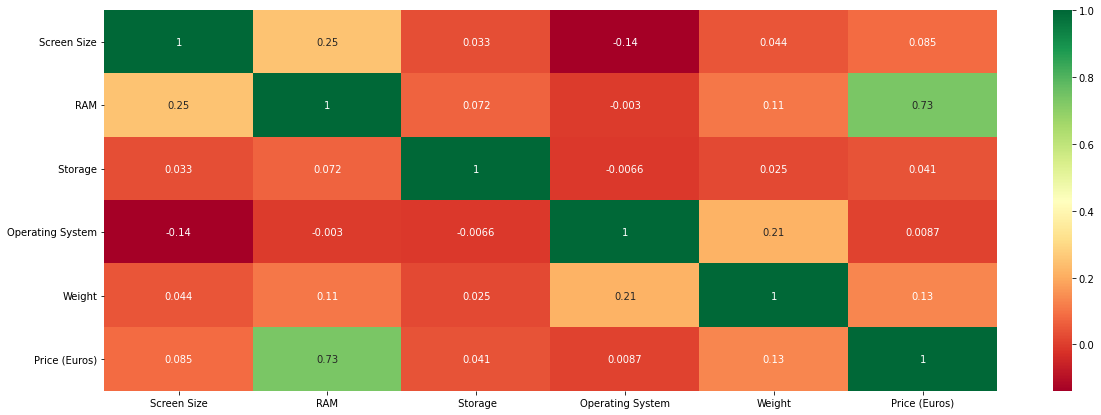

In [143]:
plt.figure(figsize=(20,7))
sns.heatmap(data_norm.corr(), annot=True, cmap='RdYlGn')


We can see there are lot of co-relation among the variables. The co-relation between RAM and Price (Euros) being the highest (0.73), it may mean that essentially both are measuring or predicting same thing

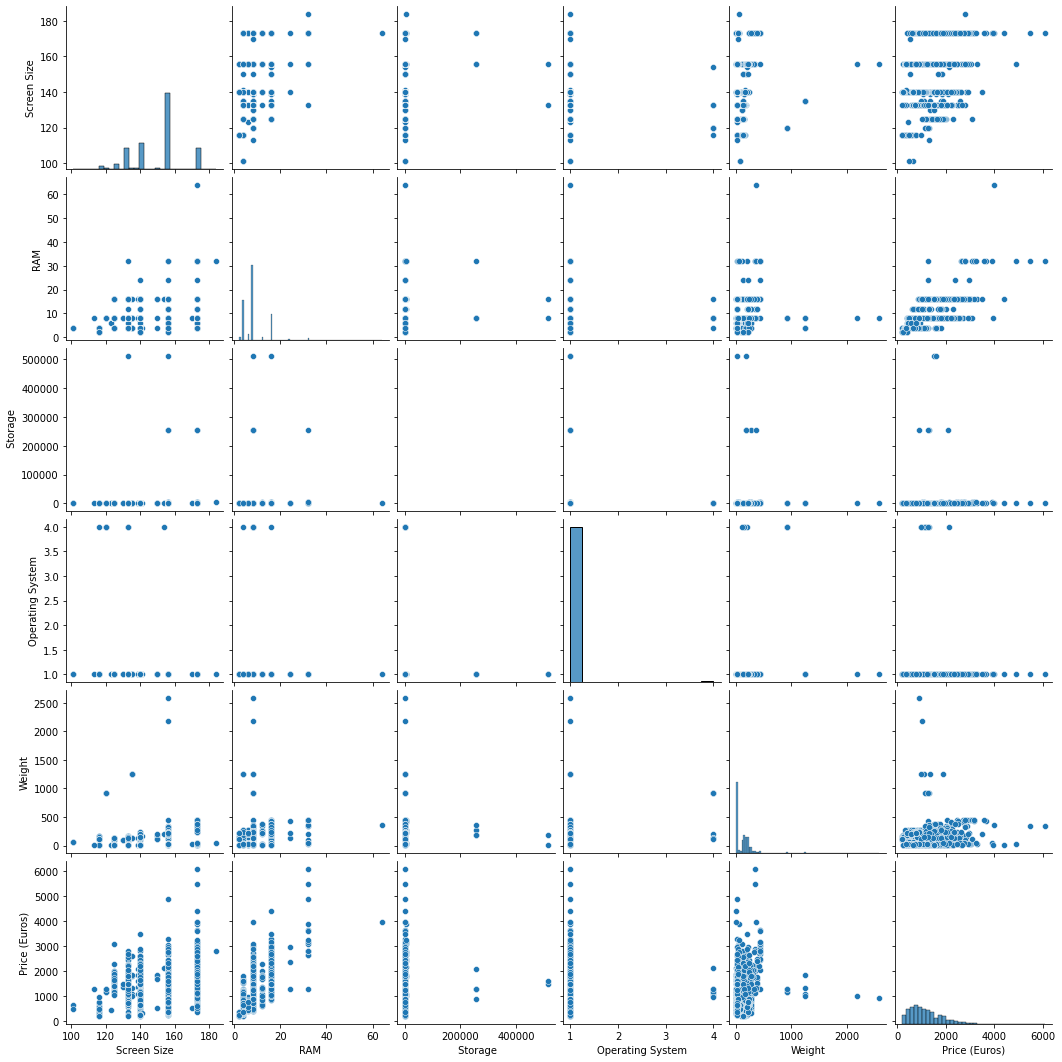

In [144]:
sns.pairplot(data_norm)

From this we can relate that Price is more dependent on RAM than all the other variables.

# Identifing predictor significance

#Method 2:
By using model summary using ordinary least squared regression, we can see that higher T-statistic value gives more importance to the significance of the predictor variables.

In [145]:
import statsmodels.api as sm
model = sm.OLS(data_norm['Price (Euros)'], data_norm[['Screen Size', 'RAM', ' Storage', 'Operating System', 'Weight']].replace(',', '', regex = True).astype(float)).fit()

In [146]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Price (Euros)   R-squared (uncentered):                   0.880
Model:                            OLS   Adj. R-squared (uncentered):              0.879
Method:                 Least Squares   F-statistic:                              1648.
Date:                Sun, 05 Feb 2023   Prob (F-statistic):                        0.00
Time:                        03:58:46   Log-Likelihood:                         -8602.5
No. Observations:                1133   AIC:                                  1.721e+04
Df Residuals:                    1128   BIC:                                  1.724e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Screen Size          1.0131      0.393      2.578      0.010       0.242       1.784
RAM                 99.7715      2.819     35.390      0.000      94.240     105.303
 Storage            -0.0004      0.001     -0.677      0.498      -0.001       0.001
Operating System   133.8631     52.082      2.570      0.010      31.675     236.051
Weight               0.2242      0.091      2.473      0.014       0.046       0.402
==============================================================================
Omnibus:                      219.392   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              909.449
Skew:                           0.862   Prob(JB):                    3.28e-198
Kurtosis:                       7.037   Cond. No.                     9.62e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# **Method 3:**
We can use model coefficiants to determine the importance of he varible. For this 
- We must first build our model
- Fit the values of train on the model
- And use model.coef_ to retrieve the coefficients.
 
# Building the Model

Train ,Validation and Test split

In [147]:
from sklearn.model_selection import train_test_split

x = data_norm[['Screen Size', 'RAM', 'Operating System', ' Storage', 'Weight']]
y = data_norm[['Price (Euros)']]

print(x.head())

    Screen Size  RAM  Operating System   Storage  Weight
5         156.0    4                 1       500    21.0
6         154.0   16                 4       256   204.0
8         140.0   16                 1       512    13.0
9         140.0    8                 1       256    16.0
13        156.0    4                 1       256    22.0


In [148]:
X_t, X_test, y_t, y_test = train_test_split(x, y, test_size=0.1, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15)

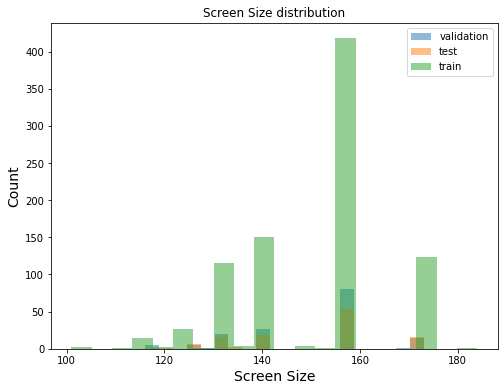

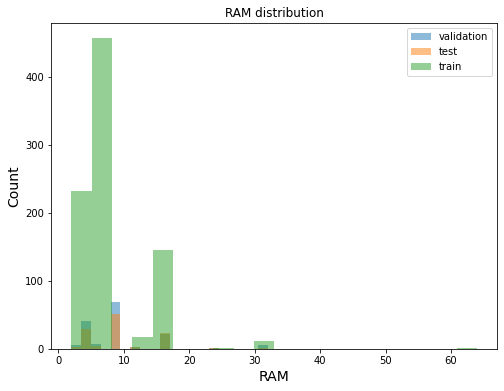

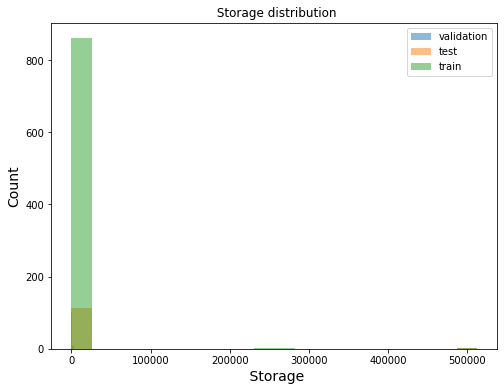

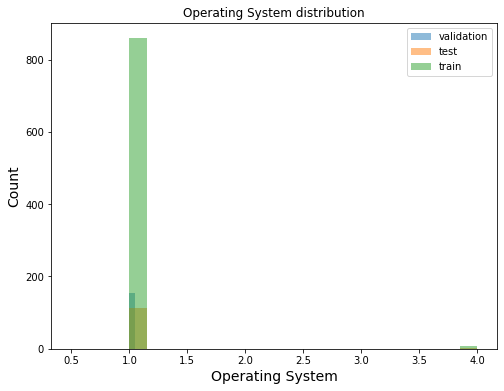

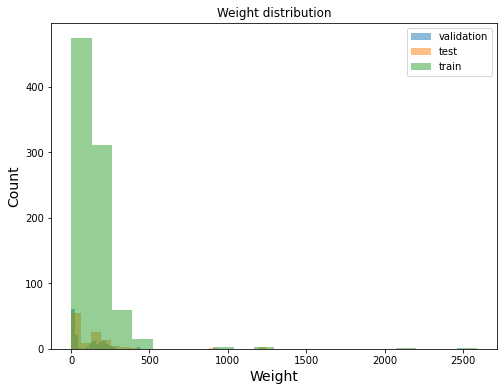

In [149]:
X_test_plot = X_test[['Screen Size', 'RAM', ' Storage', 'Operating System', 'Weight']]

X_val_plot = x_val[['Screen Size', 'RAM', ' Storage', 'Operating System', 'Weight']]

X_train_plot = x_train[['Screen Size', 'RAM', ' Storage','Operating System', 'Weight']]
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show() 

# Linear Regression

In [160]:
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model


In [157]:
y_predict = regr.predict(x_train)
print('Mean squared error is: {}'.format(mean_squared_error(y_train, y_predict)))

r2 = r2_score(y_train,y_predict)
print('R^2 score on tarining set =',r2)

Mean squared error is: 226810.42538676434
R^2 score on tarining set = 0.5351085400682676


In [151]:
y_predict = regr.predict(X_test)
print('Mean squared error is: {}'.format(mean_squared_error(y_test, y_predict)))

r2 = r2_score(y_test,y_predict)
print('R^2 score on tarining set =',r2)

Mean squared error is: 222433.89186021412
R^2 score on tarining set = 0.6000513196957113


In [152]:
y_predict = regr.predict(x_val)
print('Mean squared error is: {}'.format(mean_squared_error(y_val, y_predict)))

r2 = r2_score(y_val,y_predict)
print('R^2 score on tarining set =',r2)

Mean squared error is: 192358.74659908368
R^2 score on tarining set = 0.6146427850085108


# Understanding the Important Features

In [161]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(regr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.9821 ± 0.1444,RAM
0.0236 ± 0.0162,Screen Size
0.0138 ± 0.0220,Weight
0.0017 ± 0.0034,Storage
0.0001 ± 0.0021,Operating System


# Imputing Data for 1%, 5% and 10%

KNN Imputation

In [162]:
#Imputation using KNN, removed 5% of data from Danceability column 
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
data_norm_mainImpute = data_norm.copy(deep=True)
def removeRandomData(dataset, percent, col):
    dataset.loc[dataset.sample(frac = percent).index, col] = np.nan


data_norm_mainImpute['RAM10'] = data_norm_mainImpute['RAM']
data_norm_mainImpute['RAM5'] = data_norm_mainImpute['RAM']
data_norm_mainImpute['RAM1'] = data_norm_mainImpute['RAM']

removeRandomData(data_norm_mainImpute, 0.10, 'RAM10')
removeRandomData(data_norm_mainImpute, 0.05, 'RAM5')
removeRandomData(data_norm_mainImpute, 0.01, 'RAM1')
print(data_norm_mainImpute.isnull().sum())

Screen Size           0
RAM                   0
 Storage              0
Operating System      0
Weight                0
Price (Euros)         0
RAM10               113
RAM5                 57
RAM1                 11
dtype: int64


# Making DataFrames

In [163]:
data_norm_num1 = data_norm_mainImpute[['Screen Size', ' Storage', 'Operating System', 'Weight', 'RAM1']]
data_norm_num5 = data_norm_mainImpute[['Screen Size', ' Storage', 'Operating System', 'Weight', 'RAM5']]
data_norm_num10 = data_norm_mainImpute[['Screen Size', ' Storage', 'Operating System', 'Weight', 'RAM10']]
data_norm_og = data_norm_mainImpute['RAM']

In [164]:
data_norm_Impute=data_norm.copy(deep= True)

In [165]:
from sklearn.metrics import accuracy_score
imputer = KNNImputer(n_neighbors=10)
### For the 1% imputation ###
imputer.fit_transform(data_norm_num1)
imputed_number_df = pd.DataFrame(imputer.fit_transform(data_norm_num1), columns = data_norm_num1.columns)
print(imputed_number_df.isnull().sum())
imputed_number_df['RAM'] = data_norm_og
imputed_number_df['orignalVimputed_01'] = data_norm['RAM'].sub(imputed_number_df['RAM1'], axis = 0)

percent_change_1 = (imputed_number_df['orignalVimputed_01'].sum() / imputed_number_df['orignalVimputed_01'].count())*100
print("The perecent change of the orignal vs imputed value of 1% values is: {}".format(percent_change_1))


### For the 5% imputation ###
imputer.fit_transform(data_norm_num5)
imputed_number_df = pd.DataFrame(imputer.fit_transform(data_norm_num5), columns = data_norm_num5.columns)
imputed_number_df['RAM'] = data_norm_og
imputed_number_df['orignalVimputed_05'] = data_norm['RAM'].sub(imputed_number_df['RAM5'], axis = 0)
percent_change_5 = (imputed_number_df['orignalVimputed_05'].sum() / imputed_number_df['orignalVimputed_05'].count())*100
print("The perecent change of the orignal vs imputed value of 5% values is: {}".format(percent_change_5))

### For the 10% imputation ###
imputer.fit_transform(data_norm_num10)
imputed_number_df = pd.DataFrame(imputer.fit_transform(data_norm_num10), columns = data_norm_num10.columns)
imputed_number_df['RAM'] = data_norm_og
imputed_number_df['orignalVimputed_10'] = data_norm['RAM'].sub(imputed_number_df['RAM10'], axis = 0)
percent_change_10 = (imputed_number_df['orignalVimputed_10'].sum() / imputed_number_df['orignalVimputed_10'].count())*100
print("The perecent change of the orignal vs imputed value of 10% values is: {}".format(percent_change_10))



Screen Size         0
 Storage            0
Operating System    0
Weight              0
RAM1                0
dtype: int64
The perecent change of the orignal vs imputed value of 1% values is: -4.320486815415819
The perecent change of the orignal vs imputed value of 5% values is: -4.7261663286004065
The perecent change of the orignal vs imputed value of 10% values is: 1.4807302231237318


#Mean Imputation

In [166]:
### Specifying the imputer. ###
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

### FOR the 1 % imputed values using Mean method ###
mean_imputer = mean_imputer.fit(data_norm_num1)
results = mean_imputer.transform(data_norm_num1.values)
imputed_number_df = pd.DataFrame(mean_imputer.transform(results), columns = data_norm_num1.columns)
results.round()
imputed_number_df['RAM'] = data_norm_og
imputed_number_df['orignalVimputed_01'] = imputed_number_df['RAM'].sub(imputed_number_df['RAM1'], axis = 0)
percent_change_1 = (imputed_number_df['orignalVimputed_01'].sum() / imputed_number_df['orignalVimputed_01'].count())*100

mean_imputer = mean_imputer.fit(data_norm_num5)
results = mean_imputer.transform(data_norm_num5.values)
imputed_number_df = pd.DataFrame(mean_imputer.transform(results), columns = data_norm_num5.columns)
results.round()
imputed_number_df['RAM'] = data_norm_og
imputed_number_df['orignalVimputed_05'] = imputed_number_df['RAM'].sub(imputed_number_df['RAM5'], axis = 0)
percent_change_5 = (imputed_number_df['orignalVimputed_05'].sum() / imputed_number_df['orignalVimputed_05'].count())*100

mean_imputer = mean_imputer.fit(data_norm_num10)
results = mean_imputer.transform(data_norm_num10.values)
imputed_number_df = pd.DataFrame(mean_imputer.transform(results), columns = data_norm_num10.columns)
results.round()
imputed_number_df['RAM'] = data_norm_og
imputed_number_df['orignalVimputed_10'] = imputed_number_df['RAM'].sub(imputed_number_df['RAM10'], axis = 0)
percent_change_10 = (imputed_number_df['orignalVimputed_10'].sum() / imputed_number_df['orignalVimputed_10'].count())*100



print("The perecent change of the orignal vs imputed value for 1% missing data is: {}".format(percent_change_1))
print("The perecent change of the orignal vs imputed value for 5% missing data is: {}".format(percent_change_5))
print("The perecent change of the orignal vs imputed value for 10% missing data is: {}".format(percent_change_10))

The perecent change of the orignal vs imputed value for 1% missing data is: -4.631507775523999
The perecent change of the orignal vs imputed value for 5% missing data is: -8.661785442288696
The perecent change of the orignal vs imputed value for 10% missing data is: -0.07636320248178075


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SimpleImput

#Median Imputation

In [167]:
### Specifying the imputer. ###
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='median')

### FOR the 1 % imputed values using Mean method ###
mean_imputer = mean_imputer.fit(data_norm_num1)
results = mean_imputer.transform(data_norm_num1.values)
imputed_number_df = pd.DataFrame(mean_imputer.transform(results), columns = data_norm_num1.columns)
results.round()
imputed_number_df['RAM'] = data_norm_og
imputed_number_df['orignalVimputed_01'] = imputed_number_df['RAM'].sub(imputed_number_df['RAM1'], axis = 0)
percent_change_1 = (imputed_number_df['orignalVimputed_01'].sum() / imputed_number_df['orignalVimputed_01'].count())*100

mean_imputer = mean_imputer.fit(data_norm_num5)
results = mean_imputer.transform(data_norm_num5.values)
imputed_number_df = pd.DataFrame(mean_imputer.transform(results), columns = data_norm_num5.columns)
results.round()
imputed_number_df['RAM'] = data_norm_og
imputed_number_df['orignalVimputed_05'] = imputed_number_df['RAM'].sub(imputed_number_df['RAM5'], axis = 0)
percent_change_5 = (imputed_number_df['orignalVimputed_05'].sum() / imputed_number_df['orignalVimputed_05'].count())*100

mean_imputer = mean_imputer.fit(data_norm_num10)
results = mean_imputer.transform(data_norm_num10.values)
imputed_number_df = pd.DataFrame(mean_imputer.transform(results), columns = data_norm_num10.columns)
results.round()
imputed_number_df['RAM'] = data_norm_og
imputed_number_df['orignalVimputed_10'] = imputed_number_df['RAM'].sub(imputed_number_df['RAM10'], axis = 0)
percent_change_10 = (imputed_number_df['orignalVimputed_10'].sum() / imputed_number_df['orignalVimputed_10'].count())*100



print("The perecent change of the orignal vs imputed value for 1% missing data is: {}".format(percent_change_1))
print("The perecent change of the orignal vs imputed value for 5% missing data is: {}".format(percent_change_5))
print("The perecent change of the orignal vs imputed value for 10% missing data is: {}".format(percent_change_10))

The perecent change of the orignal vs imputed value for 1% missing data is: -3.8539553752535496
The perecent change of the orignal vs imputed value for 5% missing data is: -4.665314401622718
The perecent change of the orignal vs imputed value for 10% missing data is: 6.490872210953347


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SimpleImput

From above we can see that

- for 1% imputation, the highest percent change is in KNN
- for 5% imputation, the highest percent change is in mean
- for 10% imputation,  the highest percen change is in mean

From above we can see that the percent changes are mostly negative. This signifies that the methods are predicting higher than the orignal value.  We can also concur that the median almost stays almost consistent with the imputed values for 1, 5 and 10% but the other methods mostly degrade in accuracy the more the data is missing.

#Do the ranges of the predictor variables make sense?
A- The predictor variable popularity has min-191.90 and max-6099.00 values, and the mean is 1190.23, with the following data values the variables does makes sense.

In [168]:
data_norm.describe()

,Screen Size,RAM,Storage,Operating System,Weight,Price (Euros)
count,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000
mean,150.249779,8.688438,2375.533098,1.021183,122.744925,1190.237988
std,14.128396,5.254564,26297.473767,0.251307,162.198961,705.021847
min,101.000000,2.000000,1.000000,1.000000,2.000000,191.900000
25%,140.000000,4.000000,128.000000,1.000000,22.000000,669.000000
50%,156.000000,8.000000,256.000000,1.000000,116.000000,1049.260000
75%,156.000000,8.000000,512.000000,1.000000,191.000000,1545.640000
max,184.000000,64.000000,512512.000000,4.000000,2591.000000,6099.000000


# Remove outliers and keep outliers (does if have an effect of the final predictive model)?

In [169]:
from scipy import stats

df_c = data_norm.copy()
print(df_c.head())
def removeOutliers(data_norm):
  data = data_norm[(np.abs(stats.zscore(data_norm)) < 3).all(axis=1)]
  return data
df1 = removeOutliers(df_c)
from sklearn.model_selection import  train_test_split
df_noOutliers = df1[['Screen Size', 'RAM', ' Storage','Operating System', 'Weight', 'Price (Euros)']]
print(len(df_noOutliers))
print(len(df1))
#df['Popularity'] 



X = df_noOutliers[['Screen Size', 'RAM', ' Storage','Operating System', 'Weight']]

y = df_noOutliers['Price (Euros)']

print(len(X))
print(len(y))

#Spliting data into Training set, Validation set and Test set 20%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

  # Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

    Screen Size  RAM   Storage  Operating System  Weight  Price (Euros)
5         156.0    4       500                 1    21.0         400.00
6         154.0   16       256                 4   204.0        2139.97
8         140.0   16       512                 1    13.0        1495.00
9         140.0    8       256                 1    16.0         770.00
13        156.0    4       256                 1    22.0         498.90
1091
1091
1091
1091


LinearRegression()

In [170]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on training set =',r2)

Mean squared error: 180644.93
Coefficient of determination: 0.52
R^2 score on training set = 0.5177073362190039


In [171]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 185153.95
Coefficient of determination: 0.58
R^2 score on test set = 0.5838574655106212


In [172]:
# Make predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))
r2_val = r2_score(y_val,y_pred)
print('R^2 score on validation set =',r2_val)

Mean squared error: 155376.42
Coefficient of determination: 0.61
R^2 score on validation set = 0.6116794836695407


In the above code we have removed the outliers from the original dataset and made predictions using training, test and validation set, if we compare these values with the dataset with outliers it does not significantly affects the predictive model.

#References
https://www.analyticsvidhya.com/blog/2021/09/q-q-plot-ensure-your-ml-model-is-based-on-the-right-distributions/

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://scikit-learn.org/stable/modules/impute.html

https://www.ucd.ie/ecomodel/Resources/QQplots_WebVersion.html#:~:text=Normally%20distributed%20data,-Below%20is%20an&text=The%20normal%20distribution%20is%20symmetric,deviate%20from%20the%20straight%20line).

https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML_Data_Cleaning_and_Feature_Selection_Abalone.ipynb

https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML_Data_Cleaning_and_Feature_Selection_Wine_Quality.ipynb 